In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.inspection import permutation_importance
import pandas as pd
import os, sys
module_path = os.path.abspath(os.path.join('../..'))
if module_path not in sys.path:
    sys.path.append(module_path)

import utils
%store -r grid

## Visualizing Random Forest

### Feature importance based on mean decrease in impurity

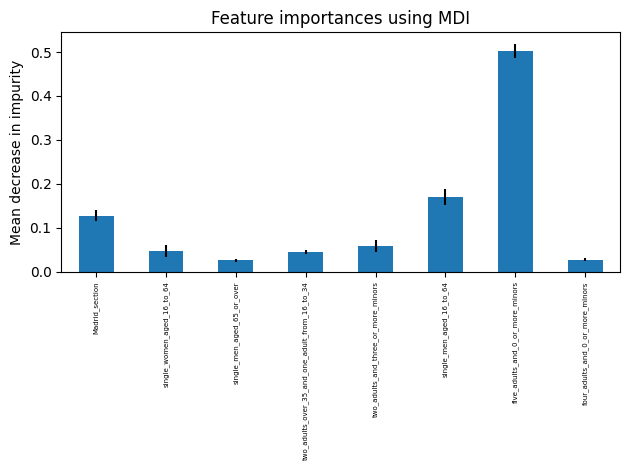

In [2]:
X_train, X_test, y_train, y_test = utils.load_data('.')
best_model = grid.best_estimator_
importances = best_model.feature_importances_
std = np.std([tree.feature_importances_ for tree in best_model.estimators_], axis=0)
forest_importances = pd.Series(importances, index=X_train.columns)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
ax.tick_params(axis='x', labelsize=5)
fig.tight_layout()

### Feature importance based on feature permutation

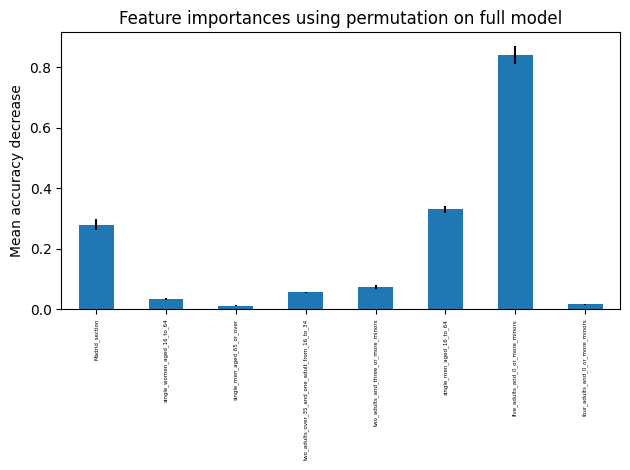

In [5]:
result = permutation_importance(
    best_model, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)

forest_importances = pd.Series(result.importances_mean, index=X_train.columns)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
ax.tick_params(axis='x', labelsize=4)
fig.tight_layout()
plt.show()